In [147]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [148]:
data = pd.read_csv(r'D:\studydata\machine bild learn\LSTM\archive\DailyDelhiClimateTrain.csv')

In [149]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [150]:
data.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [151]:

data = data.drop(data.index[-1])

data=data.drop(columns=['date'])


In [152]:
data.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [153]:
data.head()

,meantemp,humidity,wind_speed,meanpressure
0,10.000000,84.500000,0.000000,1015.666667
1,7.400000,92.000000,2.980000,1017.800000
2,7.166667,87.000000,4.633333,1018.666667
3,8.666667,71.333333,1.233333,1017.166667
4,6.000000,86.833333,3.700000,1016.500000


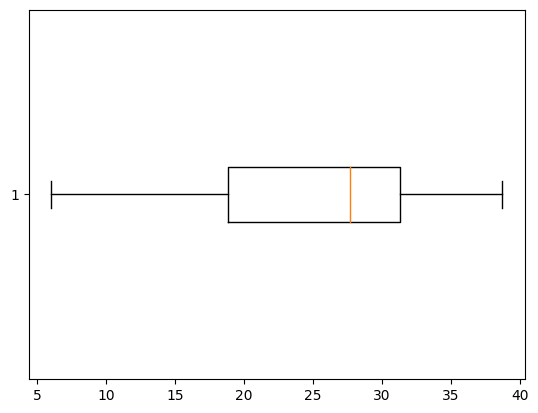

In [154]:
plt.boxplot(data['meantemp'],vert=False)
plt.show()

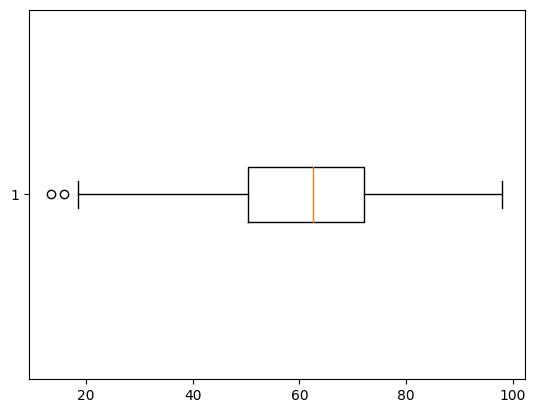

In [155]:
plt.boxplot(data['humidity'],vert=False)
plt.show()

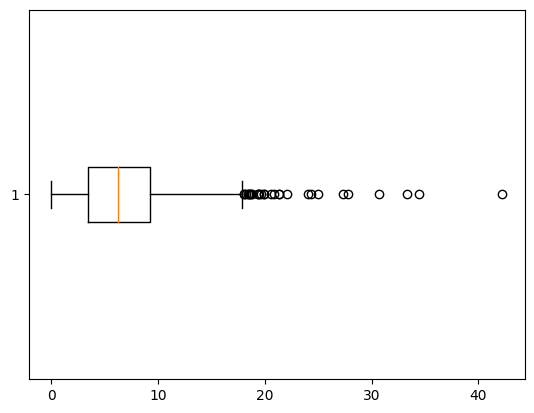

In [156]:
plt.boxplot(data['wind_speed'], vert=False)
plt.show()

In [157]:
data['wind_speed'].describe()

count    1461.000000
mean        6.806865
std         4.559688
min         0.000000
25%         3.475000
50%         6.250000
75%         9.250000
max        42.220000
Name: wind_speed, dtype: float64

In [158]:
median = data.loc[data['wind_speed']<15, 'wind_speed'].median()
print(median)
data.loc[data['wind_speed']<1,'wind_speed'] = np.nan
data.loc[data['wind_speed']>15,'wind_speed'] = np.nan
data['wind_speed'].fillna(median,inplace=True)
data['wind_speed']

5.875000000000001


0       5.875000
1       2.980000
2       4.633333
3       1.233333
4       3.700000
          ...   
1456    8.335000
1457    3.547826
1458    6.000000
1459    6.266667
1460    7.325000
Name: wind_speed, Length: 1461, dtype: float64

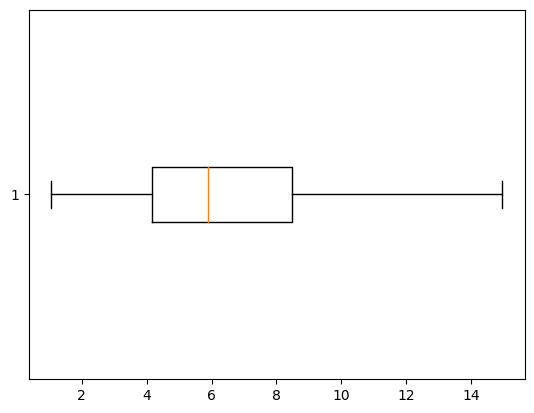

In [159]:
plt.boxplot(data['wind_speed'],vert=False)
plt.show()

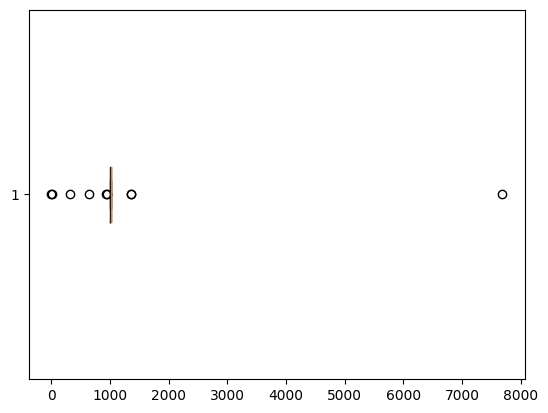

In [160]:
plt.boxplot(data['meanpressure'], vert=False)
plt.show()

In [161]:
data['meanpressure'].describe()

count    1461.000000
mean     1011.101197
std       180.293335
min        -3.041667
25%      1001.571429
50%      1008.555556
75%      1014.937500
max      7679.333333
Name: meanpressure, dtype: float64

In [162]:
median1 = data.loc[data['meanpressure']<1050, 'meanpressure'].median()
data.loc[data['meanpressure'] > 1050 , 'meanpressure'] = np.nan #atmospheric pressure usually lies between 760 and 1050 atm
data.loc[data['meanpressure'] < 760 , 'meanpressure'] = np.nan
data['meanpressure'].fillna(median1,inplace=True)

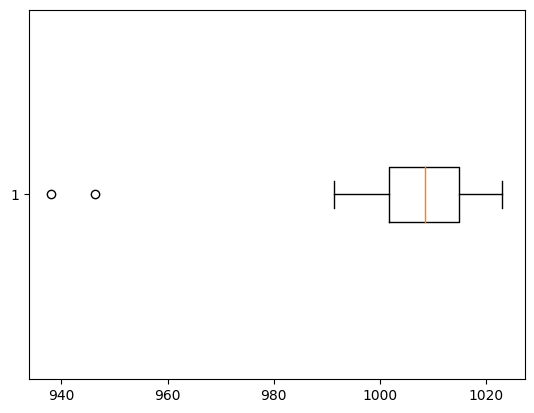

In [163]:
#Boxplot after replacing necessary outliers from meanpressure
plt.boxplot(data['meanpressure'], vert=False)
plt.show()

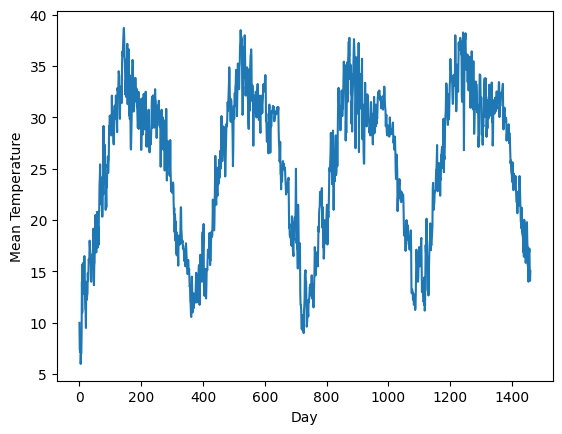

In [164]:
plt.plot(data['meantemp'])
plt.xlabel('Day')
plt.ylabel('Mean Temperature')
plt.show()

In [165]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler2=MinMaxScaler()
scaler3=MinMaxScaler()
scaler4=MinMaxScaler()

meantemp_scaled = scaler.fit_transform(data[['meantemp']])
humidity_scaled = scaler2.fit_transform(data[['humidity']])
windspeed_scaled = scaler3.fit_transform(data[['wind_speed']])
meanpressure_scaled = scaler4.fit_transform(data[['meanpressure']])

In [166]:
print(len(data['meantemp']))
print(len(data['humidity']))
print(len(data['wind_speed']))
print(len(data['meanpressure']))

1461
1461
1461
1461


In [167]:
X_scaled = np.concatenate((meantemp_scaled, humidity_scaled, windspeed_scaled, meanpressure_scaled), axis=1)
X_scaled.shape

(1461, 4)

In [176]:
x=[]
for i in range(X_scaled.shape[0]-30):
   
    row = X_scaled[i:i+31]
    
    x.append(row)

x=np.array(x)
print(x.shape)
print('-----------------')
X_train = x[:,:-1] #1st 30 values will be considered as x values
print(X_train)
Y_train = x[:,-1,0] #last value will be considered as our y value
print(Y_train)
X_train.shape ,Y_train.shape, X_train.ndim, Y_train.ndim

(1431, 31, 4)
-----------------
[[[0.12227074 0.84037162 0.34678663 0.91365777]
  [0.04279476 0.92905405 0.13840617 0.93877551]
  [0.0356623  0.86993243 0.25741217 0.94897959]
  ...
  [0.27001456 0.50337838 0.19023136 0.93916797]
  [0.24836245 0.61570946 0.15694087 0.92494113]
  [0.26637555 0.67398649 0.         0.93944831]]

 [[0.04279476 0.92905405 0.13840617 0.93877551]
  [0.0356623  0.86993243 0.25741217 0.94897959]
  [0.08151383 0.68468468 0.01268209 0.93131868]
  ...
  [0.24836245 0.61570946 0.15694087 0.92494113]
  [0.26637555 0.67398649 0.         0.93944831]
  [0.31179039 0.61689189 0.13696658 0.94583987]]

 [[0.0356623  0.86993243 0.25741217 0.94897959]
  [0.08151383 0.68468468 0.01268209 0.93131868]
  [0.         0.86796171 0.19023136 0.92346939]
  ...
  [0.26637555 0.67398649 0.         0.93944831]
  [0.31179039 0.61689189 0.13696658 0.94583987]
  [0.30567686 0.70439189 0.0837018  0.91758242]]

 ...

 [[0.47719554 0.4764452  0.01308198 0.90580848]
  [0.42396051 0.78819036 0

((1431, 30, 4), (1431,), 3, 1)

In [177]:
X_train = X_train.reshape(-1,4,30)


In [185]:
model=Sequential()
model.add(LSTM(100, input_shape=(4,30), return_sequences=True))
model.add(LSTM(100, return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(100, return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(100, return_sequences=False, recurrent_dropout=0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')



In [210]:
history=model.fit(X_train, Y_train, batch_size=32, epochs=50)

Epoch 1/50
45/45 [==============================] - 1s 29ms/step - loss: 0.0052
Epoch 2/50
45/45 [==============================] - 1s 26ms/step - loss: 0.0046
Epoch 3/50
45/45 [==============================] - 1s 26ms/step - loss: 0.0039
Epoch 4/50
45/45 [==============================] - 1s 26ms/step - loss: 0.0037
Epoch 5/50
45/45 [==============================] - 1s 26ms/step - loss: 0.0039
Epoch 6/50
45/45 [==============================] - 1s 25ms/step - loss: 0.0046
Epoch 7/50
45/45 [==============================] - 1s 25ms/step - loss: 0.0035
Epoch 8/50
45/45 [==============================] - 1s 25ms/step - loss: 0.0034
Epoch 9/50
45/45 [==============================] - 1s 25ms/step - loss: 0.0034
Epoch 10/50
45/45 [==============================] - 1s 26ms/step - loss: 0.0035
Epoch 11/50
45/45 [==============================] - 1s 25ms/step - loss: 0.0032
Epoch 12/50
45/45 [==============================] - 1s 26ms/step - loss: 0.0032
Epoch 13/50
45/45 [==================

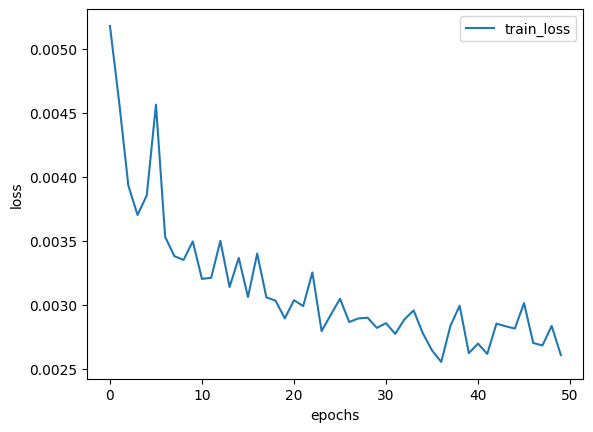

In [211]:
#（10）获取训练信息
history_dict = history.history  # 获取训练的数据字典
train_loss = history_dict['loss']  # 训练集损失
#accuracy = history_dict['accuracy']  # 验证集损失
 
#（11）绘制训练损失和验证损失
plt.figure()
plt.plot(range(50), train_loss, label='train_loss')  # 训练集损失
#plt.plot(range(5), accuracy, label='accuracy')  # 验证集损失
plt.legend()  # 显示标签
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

## Reading Testing Data

In [214]:
data_test = pd.read_csv(r'D:\studydata\machine bild learn\LSTM\archive\DailyDelhiClimateTest.csv')

In [215]:
data_test.head()


,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [216]:
data_test.tail()

,date,meantemp,humidity,wind_speed,meanpressure
109,2017-04-20,34.500,27.500000,5.562500,998.625000
110,2017-04-21,34.250,39.375000,6.962500,999.875000
111,2017-04-22,32.900,40.900000,8.890000,1001.600000
112,2017-04-23,32.875,27.500000,9.962500,1002.125000
113,2017-04-24,32.000,27.142857,12.157143,1004.142857


In [217]:
new_data = pd.DataFrame()
new_data = (data.tail(30)).append(data_test)
new_data = new_data.drop(columns=['date'])

In [196]:
new_data.head()

,meantemp,humidity,wind_speed,meanpressure
84,29.100000,37.100000,17.590000,1010.200000
85,29.500000,38.625000,13.650000,1009.500000
86,29.888889,40.666667,8.844444,1009.000000
87,31.000000,34.500000,13.200000,1007.125000
88,29.285714,36.857143,10.585714,1007.142857


In [218]:
new_data.shape

(144, 4)

In [219]:
meantemp_scaled1 = scaler.fit_transform(new_data[['meantemp']])
humidity_scaled1 = scaler2.fit_transform(new_data[['humidity']])
windspeed_scaled1 = scaler3.fit_transform(new_data[['wind_speed']])
meanpressure_scaled1 = scaler4.fit_transform(new_data[['meanpressure']])

In [221]:
new_data_scaled = np.concatenate((meantemp_scaled1, humidity_scaled1, windspeed_scaled1, meanpressure_scaled1), axis=1)

In [222]:
x1=[]
for i in range(new_data_scaled.shape[0]-30):
    row = new_data_scaled[i:i+31]
    x1.append(row)
    
x1=np.array(x1)
X_test = x1[:,:-1]
Y_test = x1[:,-1,0]
X_test.shape ,Y_test.shape, X_test.ndim, Y_test.ndim

((114, 30, 4), (114,), 3, 1)

In [223]:
X_test = X_test.reshape(-1,4,30)

In [224]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) #converting the predictions to original scale again

Y_test = Y_test.reshape(-1,1) #convert Y_test to same shape as predictions
Y_test = scaler.inverse_transform(Y_test)

In [225]:
#first 10 actual values
Y_test[:10]

array([[15.91304348],
       [18.5       ],
       [17.11111111],
       [18.7       ],
       [18.38888889],
       [19.31818182],
       [14.70833333],
       [15.68421053],
       [14.57142857],
       [12.11111111]])

In [226]:
#first 10 predicted values
predictions[:10]

array([[31.292461],
       [25.126621],
       [22.485718],
       [20.492184],
       [20.282936],
       [18.983347],
       [17.776478],
       [17.33219 ],
       [16.902037],
       [14.862027]], dtype=float32)

In [232]:
#Coefficient of Determination
r2_score = r2_score(Y_test, predictions)
r2_score

TypeError: 'numpy.float64' object is not callable

In [229]:
#Mean Absolute Error 
mae = mean_absolute_error(Y_test, predictions)
mae

1.8898375937177214

In [230]:
#Root Mean Square Error
mse = mean_squared_error(Y_test, predictions)
np.sqrt(mse)

2.6436636026886395

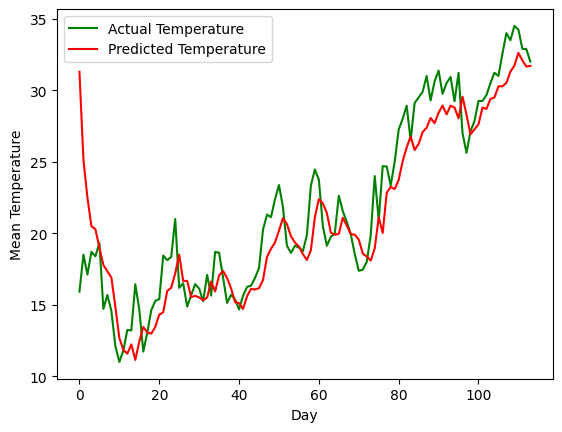

In [231]:
plt.plot(Y_test, label='Actual Temperature', color='green')
plt.plot(predictions, label='Predicted Temperature', color='red')
plt.legend(loc='best')
plt.xlabel('Day')
plt.ylabel('Mean Temperature')
plt.show()